### Note: This is the code for modeling home loan credit risk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../Data/application_train.csv', header=0)

# Note SQL select example:  
<h2 style="color:Tomato"><i> select * from DF limit 10 </i></h2>


In [15]:
df.head(10)
#Show the data example

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Note Example:  
<h2 style="color:Tomato"><i> Find Column Name </i></h2>


In [39]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# Note SQL select example:  
<h2 style="color:Tomato"><i> select * from DF where TARGET == 1 limit 10</i></h2>


In [16]:
df[df.TARGET == 1].head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
138,100160,1,Cash loans,M,N,Y,0,292500.0,675000.0,36747.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
154,100181,1,Cash loans,F,N,Y,0,157500.0,245619.0,12667.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
163,100192,1,Cash loans,F,N,N,0,111915.0,225000.0,21037.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Note SQL select example:  
<h2 style="color:Tomato"><i> select count(*) from DF </i></h2>


In [83]:
a=df.count()
a.head(10)

SK_ID_CURR            307511
TARGET                307511
NAME_CONTRACT_TYPE    307511
CODE_GENDER           307511
FLAG_OWN_CAR          307511
FLAG_OWN_REALTY       307511
CNT_CHILDREN          307511
AMT_INCOME_TOTAL      307511
AMT_CREDIT            307511
AMT_ANNUITY           307499
dtype: int64

# Note SQL select example:  
<h2 style="color:Tomato"><i> select Field, count(*) from DF group by Field </i></h2>


In [84]:
ID_Count = df.groupby('NAME_CONTRACT_TYPE').size().reset_index(name='Size')


In [85]:
ID_Count

,NAME_CONTRACT_TYPE,Size
0,Cash loans,278232
1,Revolving loans,29279


# Note SQL select example:  
<h2 style="color:Tomato"><i> select Field1,Field2, count(*) from DF group by Field1,Field2 order by Field1,Field2</i></h2>

In [86]:
ID_Count1 = df.groupby(['NAME_CONTRACT_TYPE','FLAG_OWN_REALTY']).size().reset_index(name='Size')

In [88]:
ID_Count1

,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,Size
0,Cash loans,N,88025
1,Cash loans,Y,190207
2,Revolving loans,N,6174
3,Revolving loans,Y,23105


# Note Change Field NAME  
<h2 style="color:Tomato"><i> Change Field Name</i></h2>

In [109]:
ID_Count1=ID_Count1.rename(columns={'NAME_CONTRACT_TYPE':'Loan_Type','FLAG_OWN_REALTY':'F_OWN_Property','Size':'Counts'})

# Note Plot BarChart:  
<h2 style="color:Tomato"><i> Plot Bar Chart</i></h2>

In [142]:
ind = np.arange(len(ID_Count1))
xlable=ID_Count1.Loan_Type+"+Property_"+ID_Count1.F_OWN_Property

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]), <a list of 9 Text yticklabel objects>)

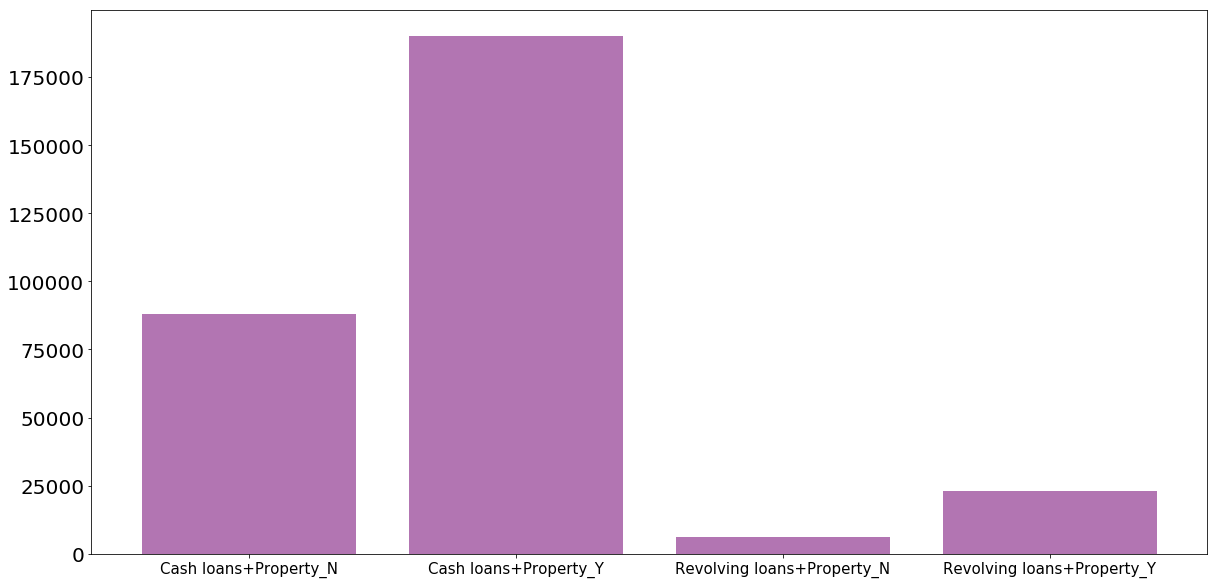

In [144]:
plt.figure(figsize=(20,10))
plt.bar(ind,ID_Count1.Counts,color=(0.5,0.1,0.5,0.6))
plt.xticks(ind,xlable,fontsize=15,wrap=True)
plt.yticks(fontsize=20)


In [129]:
ind

array([0, 1, 2, 3])